# **Алгоритм реализации модели ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

## **<span style="color:blue"> Описание**
**Логистическая регрессия (или логит-модель) — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. В данном примере логистическая регрессия реализована на основе данных wallet.csv, полученных ранее**

In [22]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **<span style="color:blue"> Необходимые библиотеки**  
**pandas** — это библиотека в Python, набор заранее подготовленных методов и функций для анализа структурированных данных.  
**numpy** — это фундаментальный пакет для научных вычислений на Python.  
**matplotlib** — это популярная Python-библиотека для визуализации данных.   
**scikit-learn** — это популярная Python-библиотека для машинного обучения, которая была разработана в рамках проекта Google Summer of Code.  
**seaborn** — это Seaborn — это библиотека для создания статистических графиков на Python.  
**imblearn** — это библиотека, предназначеная для работы с несбалансированными выборками данных  
**statsmodels** — это пакет Python, который предоставляет широкий спектр статистических моделей и инструментов для анализа данных.  

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [81]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [82]:
import seaborn as sns
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

## **<span style="color:blue"> Данные**  
Здесь происходит считывание данных из файла **wallet.csv**:  
<span style="color:green">balance</span> - баланс,   
<span style="color:green">transaction</span> - количество транзакций,  
<span style="color:green">received</span> - сколько всего было получено,  
<span style="color:green">sent</span> - сколько всего было отправлено,  
<span style="color:green">midtime</span> - среднее время между операциями,  
<span style="color:green">class</span> - опасна ли транзакция( 1 если опасна и 0 если безопасна).  

В данном случае нам нужно предсказывать параметр **class** на основе других.

In [83]:
data = pd.read_csv('dataset_creating/wallet.csv', header=0)
data = data.dropna()
print(data.shape)
data.head()

(67, 6)


,balance,transaction,received,sent,midtime,class
0,808,142828,51573901454664,51573901453856,65726,1
1,2500,86564,38981155094655,38981155092155,120030,1
2,91689978,2924,32684080222,32592390244,2825,1
3,404055099,4244,93453806226,93049751127,2689,1
4,46085585076,20484,10033550413757,9987464828681,499,1


In [84]:
data['class'].value_counts()

class
0    51
1    16
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

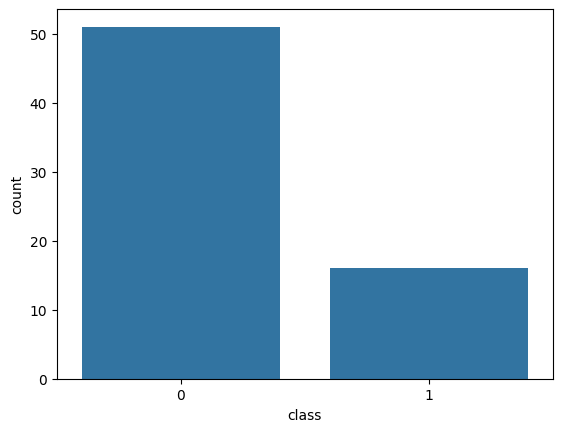

In [85]:
sns.countplot(x='class', data=data)

На данный момент данных в **wallet.csv** не так много. В дальнейшем планируется расширить существующий датасет.  
Также, можно сказать, что данные являются несбалансированными, т.к отношение небезопасных кошельков к безопасным составляет 16 : 51.

In [86]:
data.groupby('class').mean()

,balance,transaction,received,sent,midtime
class,,,,,
0,1.177339e+10,3159.921569,1.260664e+11,1.142930e+11,485705.294118
1,6.417434e+09,19085.062500,6.728543e+12,6.722125e+12,254043.875000


После группировки данных и выявления среднего значения для параметра **class** мы можем зщаметить такую тенденцию, что больше транзакцйи проводят недобросовестные кошельки и при этом проводят их с меньшим промежутком по времени чем безопасные кошельки.

## **<span style="color:blue"> Добавление данных**  
Т.к выборка является несбалансированной, то результат предсказания может оказаться неточным. Ниже мы с помощью SMOTE добавим в существующие данные искуственно созданные даннные, основывающиеся на наименьшей выборке.

In [87]:
X = data.loc[:, data.columns != 'class']
y = data.loc[:, data.columns == 'class']
new = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
new_data_X,new_data_y=new.fit_resample(X_train, y_train)
new_data_X = pd.DataFrame(data=new_data_X,columns=columns )
new_data_y= pd.DataFrame(data=new_data_y,columns=['class'])

print("Длина при избыточной выборке",len(new_data_X))
print("Добросовесные кошельки",len(new_data_y[new_data_y['class']==0]))
print("Недобросовестные кошельки",len(new_data_y[new_data_y['class']==1]))

Длина при избыточной выборке 68
Добросовесные кошельки 34
Недобросовестные кошельки 34


In [88]:
data_vars=data.values.tolist()
y=['class']
X=[i for i in data_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(new_data_X, new_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True]
[2 1 3 4 1]


Здесь мы программно определяем наиболее полезные для нас параметры. Они помечены **True** в этом случае это параметры **transaction** и **midtime**. Именно с ними мы и будем работать. На самом деле в полезности этих параметров мы косвенно убедились при рассмотрении данных, сгруппированнных по параметру **class**.

In [89]:
data.groupby('transaction').mean()

,balance,received,sent,midtime,class
transaction,,,,,
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,4.899684e+05,4.899684e+05,0.000000e+00,0.000000e+00,0.0
2,2.727271e+10,2.727539e+10,2.673588e+06,1.087999e+06,0.0
3,0.000000e+00,3.038240e+05,3.038240e+05,3.380992e+06,1.0
4,0.000000e+00,1.088778e+06,1.088778e+06,3.091800e+04,0.0
5,5.000000e+02,5.837955e+05,5.832955e+05,1.984250e+04,0.0
16,3.771598e+06,9.509598e+06,5.738000e+06,1.624230e+05,0.0
18,1.190025e+08,2.993922e+08,1.803897e+08,7.797400e+04,0.0
25,0.000000e+00,1.261920e+05,1.261920e+05,0.000000e+00,0.0


In [90]:
data.groupby('midtime').mean()

,balance,transaction,received,sent,class
midtime,,,,,
0,3.433533e+06,380.153846,8.439867e+07,8.096513e+07,0.0
18,0.000000e+00,2.000000,5.883000e+03,5.883000e+03,0.0
32,8.034108e+06,10327.000000,9.679659e+08,9.599318e+08,0.0
35,0.000000e+00,200.000000,9.778560e+05,9.778560e+05,0.0
58,0.000000e+00,2.000000,3.490180e+05,3.490180e+05,0.0
257,0.000000e+00,2.000000,1.807010e+05,1.807010e+05,0.0
402,5.609085e+10,41601.000000,6.941925e+12,6.885835e+12,1.0
475,0.000000e+00,2.000000,1.684278e+06,1.684278e+06,0.0
499,4.608559e+10,20484.000000,1.003355e+13,9.987465e+12,1.0


Здесь мы просто ради интереса посмотрели на данные сгруппированные по **transaction** и **midtime**

## **<span style="color:blue"> Реализация и обучение модели**  

In [91]:
cols=['transaction', 'midtime'] 
X=new_data_X[cols]
y=new_data_y['class']

In [92]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.643726
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: class            Pseudo R-squared: 0.071    
Date:               2024-04-02 12:55 AIC:              91.5468  
No. Observations:   68               BIC:              95.9858  
Df Model:           1                Log-Likelihood:   -43.773  
Df Residuals:       66               LL-Null:          -47.134  
Converged:          1.0000           LLR p-value:      0.0095272
No. Iterations:     9.0000           Scale:            1.0000   
-----------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
-----------------------------------------------------------------
transaction    0.0000    0.0000   1.5943  0.1109  -0.0000  0.0000
midtime       -0.0000    0.0000  -0.3293  0.7419  -0.0000  0.0000



In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred = LR.predict(X_test)
print(y_pred)
print('Точность модели: {:.2f}'.format(LR.score(X_test, y_test)))

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1]
Точность модели: 0.62


Прогноз на тестовом наборе. Точность для данного набора составила 62%

## **<span style="color:blue"> Матрица путанницы**  

In [95]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 0]
 [8 4]]


Как мы видим модель определила транзакцию правильно в 13 случаях и неправильно в 8

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       1.00      0.33      0.50        12

    accuracy                           0.62        21
   macro avg       0.76      0.67      0.60        21
weighted avg       0.80      0.62      0.58        21



Выше приведены данные модели по среднему между точностью и взешенностью. 

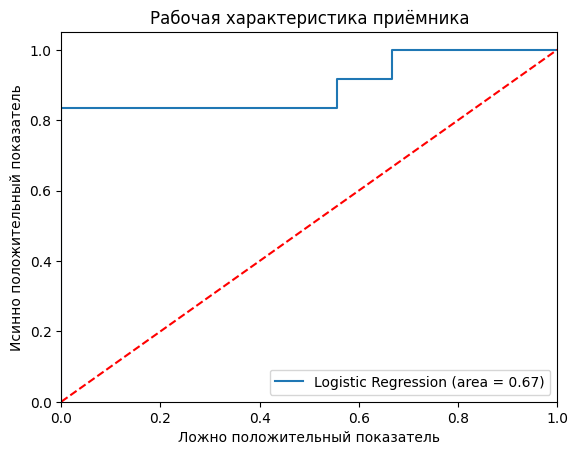

In [97]:
ROCK = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % ROCK)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительный показатель')
plt.ylabel('Исинно положительный показатель')
plt.title('Рабочая характеристика приёмника')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()